<class 'torch.Tensor'>


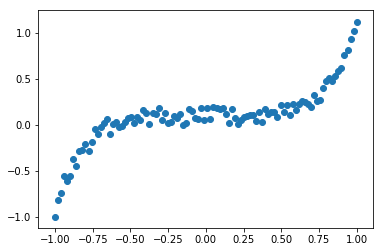

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)


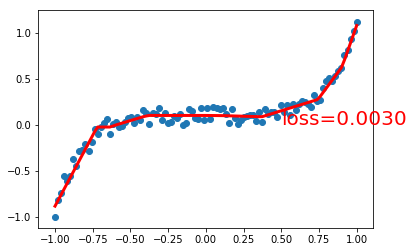

In [2]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
 
# # 批量输入的数据量
# batch_n = 1
# # 通过隐藏层后输出的特征数
# hidden_layer = 10
# # 输入数据的特征个数
# input_data = 1000
# # 最后输出的分类结果数
# output_data = 10
 
# x = Variable(torch.randn(batch_n , input_data) , requires_grad = False)
# y = Variable(torch.randn(batch_n , output_data) , requires_grad = False)
x_train = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y_train = x_train.pow(5) + 0.2*torch.rand(x_train.size())

x_train,y_train = Variable(x_train),Variable(y_train)
print(type(x_train))
plt.scatter(x_train.data,y_train.data)
plt.show()
# -------------------------------------------------------------------------
# x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

# y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# x_train = torch.from_numpy(x_train)
# y_train = torch.from_numpy(y_train)
# -------------------------------------------------------------------------
 
models = torch.nn.Sequential(
    # 首先通过其完成从输入层到隐藏层的线性变换
    torch.nn.Linear(1,10),
    # 经过激活函数
    torch.nn.ReLU(),
    # 接着完成从隐藏层1到隐藏层2的线性变换
    torch.nn.Linear(10,15),
    # 经过激活函数
    torch.nn.ReLU(),
    # 完成从隐藏层2到隐藏层3的线性变换
    torch.nn.Linear(15,20),
    # 经过激活函数
    torch.nn.ReLU(),
    # 最后完成从隐藏层3到输出层的线性变换
    torch.nn.Linear(20,1)
    
)
print(models)
 
epoch_n = 300
learning_rate = 1e-1
loss_fn = torch.nn.MSELoss()
 
optimzer = torch.optim.Adam(models.parameters(),lr = learning_rate)
 
#进行模型训练
for epoch in range(epoch_n):
    y_pred = models(x_train)
    loss = loss_fn(y_pred,y_train)
#     if epoch%20 == 0:
#         print(epoch,loss.data)
    optimzer.zero_grad()
 
    loss.backward()
 
    #进行梯度更新
    optimzer.step()
y_pred = models(x_train)
y_pred = y_pred.data.numpy()
# plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.scatter(x_train.data,y_train.data)
plt.plot(x_train.numpy(), y_pred, 'r-',lw=3)
plt.text(0.5,0,'loss=%.4f'%loss.data.item(),fontdict={'size':20,'color':'red'})
plt.show()
# print(y_train)
# print(y_pred)